# EDA

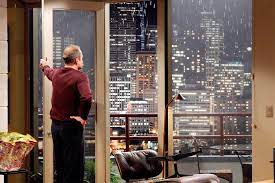

In [40]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [41]:
# importing raw data
housing_df = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [42]:
housing_df.shape # 21 columns, 21597 lines

(21597, 21)

In [43]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [45]:
#create a copy of the dataset
housing_df2 = housing_df.copy()

In [46]:
# rename certain columns so that they have more meaning
housing_df2.rename(columns = {'date' : 'selling_date','price' : 'predicted_price', 'sqft_living15': 'neighbourhood_living_space', 'sqft_lot15' : 'neighbourhood_lot_space'}, inplace = True)

# there are no duplicates!
housing_df2.duplicated().value_counts()

# check for missing values


False    21597
Name: count, dtype: int64

In [47]:
# drop uninteresting columns
housing_df2.drop(['waterfront', 'view', 'bedrooms', 'bathrooms','sqft_above','sqft_basement'], axis = 1, inplace = True)

In [48]:
# look for Nans
housing_df2
housing_df2.isna().sum()




id                               0
selling_date                     0
predicted_price                  0
sqft_living                      0
sqft_lot                         0
floors                           0
condition                        0
grade                            0
yr_built                         0
yr_renovated                  3842
zipcode                          0
lat                              0
long                             0
neighbourhood_living_space       0
neighbourhood_lot_space          0
dtype: int64

In [49]:
#housing_df2.describe(exclude = 'datetime64')

In [50]:
# check data types
housing_df2.dtypes

id                              int64
selling_date                   object
predicted_price               float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
condition                       int64
grade                           int64
yr_built                        int64
yr_renovated                  float64
zipcode                         int64
lat                           float64
long                          float64
neighbourhood_living_space      int64
neighbourhood_lot_space         int64
dtype: object

In [51]:
# adapt data types
housing_df2['floors'] = housing_df2.floors.astype('int64')
housing_df2['predicted_price'] = housing_df2.predicted_price.astype('int64')
housing_df2['id'] = housing_df2.predicted_price.astype('str')
#housing_df2['zipcode'] = housing_df2.predicted_price.astype('str')
housing_df2['selling_date'] = pd.to_datetime(housing_df2['selling_date'], dayfirst = True)
housing_df2['predicted_price'] = housing_df2.predicted_price.round()
housing_df2.head()

,id,selling_date,predicted_price,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,zipcode,lat,long,neighbourhood_living_space,neighbourhood_lot_space
0,221900,2014-10-13,221900,1180,5650,1,3,7,1955,0.000,98178,47.511,-122.257,1340,5650
1,538000,2014-12-09,538000,2570,7242,2,3,7,1951,1991.000,98125,47.721,-122.319,1690,7639
2,180000,2015-02-25,180000,770,10000,1,3,6,1933,NaN,98028,47.738,-122.233,2720,8062
3,604000,2014-12-09,604000,1960,5000,1,5,7,1965,0.000,98136,47.521,-122.393,1360,5000
4,510000,2015-02-18,510000,1680,8080,1,3,8,1987,0.000,98074,47.617,-122.045,1800,7503


In [52]:
housing_df2.dtypes

id                                    object
selling_date                  datetime64[ns]
predicted_price                        int64
sqft_living                            int64
sqft_lot                               int64
floors                                 int64
condition                              int64
grade                                  int64
yr_built                               int64
yr_renovated                         float64
zipcode                                int64
lat                                  float64
long                                 float64
neighbourhood_living_space             int64
neighbourhood_lot_space                int64
dtype: object

<Axes: >

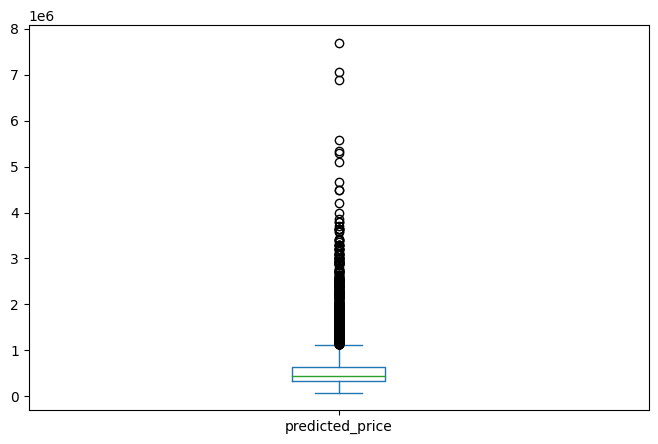

In [53]:
# statistics in boxplots

housing_df2['predicted_price'].plot(kind = 'box')


In [54]:
# how many unique postcodes are there?
housing_df2['zipcode'].nunique()

70

In [55]:
# further insights on the areas
grouped_by_zipcode = housing_df2.groupby('zipcode').count().reset_index()

# areas with most sold houses
areas_with_most_sold_houses = grouped_by_zipcode.sort_values('id', ascending = False).reset_index()
top10_areas_with_most_sold_houses = areas_with_most_sold_houses.loc[0:9,['zipcode','id']]


# areas with least sold houses
areas_with_least_sold_houses = grouped_by_zipcode.sort_values('id').reset_index()
last10_areas_with_least_sold_houses = areas_with_least_sold_houses.loc[0:9,['zipcode','id']]
last10_areas_with_least_sold_houses

top10_areas_with_most_sold_houses

,zipcode,id
0,98103,602
1,98038,589
2,98115,583
3,98052,574
4,98117,553
5,98042,547
6,98034,545
7,98118,507
8,98023,499
9,98006,498


In [56]:
grouped_by_zipcode2 = housing_df2.groupby('zipcode').mean().reset_index()

In [57]:
# import data on mean income vs zip code
income_per_zipcode_df = pd.read_csv('data/King County Income by zip code - Sheet1-4.csv')
income_per_zipcode_df.drop(columns = income_per_zipcode_df.iloc[:,0:3], axis = 1, inplace = True)
income_per_zipcode_df.rename(columns={'mean income': 'mean_income', 'ZIP': 'zip'}, inplace = True)
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.str.strip('ZIP Code')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.strip('$')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.str.replace(',', '')
income_per_zipcode_df.dropna(inplace=True)

# convert data types
income_per_zipcode_df['zip'] = income_per_zipcode_df.zip.astype('int64')
income_per_zipcode_df['mean_income'] = income_per_zipcode_df.mean_income.astype('int64')
income_per_zipcode_df

,zip,mean_income
0,98002,51430
1,98168,57610
2,98047,59000
3,98003,59070
4,98032,59980
...,...,...
73,98112,332830
74,98033,353420
75,98040,408220
76,98004,411220


In [58]:
# merge income dataframe with main dataframe

grouped_by_zipcode3 = grouped_by_zipcode2.set_index('zipcode').join(income_per_zipcode_df.set_index('zip'))

areas_with_lowest_grade = grouped_by_zipcode3.sort_values('mean_income').reset_index()
areas_with_lowest_grade.loc[0:20, ['zipcode', 'predicted_price', 'sqft_living','floors', 'condition', 'grade', 'neighbourhood_living_space', 'mean_income']]

          

,zipcode,predicted_price,sqft_living,floors,condition,grade,neighbourhood_living_space,mean_income
0,98002,234284.035,1627.744,1.286,3.744,6.693,1479.030,51430
1,98168,240328.372,1468.625,1.086,3.245,6.509,1471.680,57610
2,98003,294111.279,1928.882,1.296,3.371,7.543,1876.196,59070
3,98032,251296.240,1738.048,1.160,3.632,7.144,1668.632,59980
4,98188,289078.346,1802.772,1.184,3.331,7.037,1636.279,60230
5,98030,296187.980,1962.500,1.480,3.289,7.414,1919.422,61360
6,98148,284908.596,1610.526,1.193,3.070,6.947,1611.228,65850
7,98031,300340.403,1929.692,1.429,3.502,7.377,1908.853,68490
8,98198,302896.739,1745.361,1.186,3.443,7.104,1711.571,70720
9,98055,304262.108,1784.672,1.343,3.325,7.131,1785.728,72400
